In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the data from a csv file
wine_df = pd.read_csv('winequality-white.csv', sep = ';')

In [3]:
# printing the first few rows of our data
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## EDA (Exploratory Data Analysis)

Data wrangling (or preprocessing) involves analyzing the data to see if it needs any sort of cleaning or scaling so that it can be prepared for training the model.

As the first step of data preprocessing, we will check if there are any null values within our data that need to be dealt with.

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


As we can see, there are no null values within our dataset. This is a good thing since we won’t have to deal with any missing data. Now, let us have a look at the statistical analysis of the data.

In [5]:
wine_df.shape

(4898, 12)

In [6]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_df.duplicated().sum()

937

<Axes: >

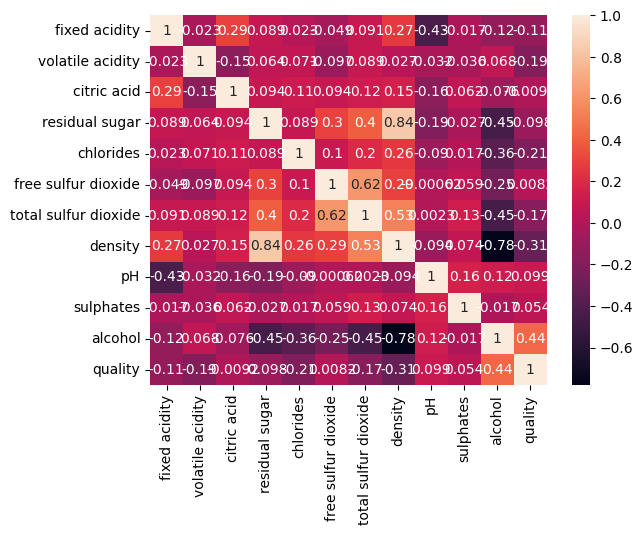

In [8]:
sns.heatmap(wine_df.corr(),annot=True,)

In [9]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


One prominent observation from the above given statistical analysis is that there’s a visible inconsistency in the range of values across different columns within our dataset. To be more clear, the values in some columns are of the order 1e-1 while in a few others, the values can go as high as of the order 1e+2. Because of this inconsistency, there are chances that a feature weight bias might arise at the time of training the model. What is basically means is that some features might end up affecting the final prediction more than the others. Therefore, in order to prevent this weight imbalance, we will have to scale our data.

For this scaling, we will be standardizing our data. Standardization typically means rescaling data in a way such that each feature column has a mean of 0 and a standard deviation of 1 (unit variance).

![Standardization](./standardization.png)

## Preprocessing

Selecting only features that has correlation more than 0.1

In [10]:
# step-1: Seperating the features set and the target array
features = wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 
       'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']]

In [11]:
features = features.to_numpy() # converts feature set to numpy array

In [12]:
target = wine_df['quality'].to_numpy() # converts target column to numpy array

Using scikit `StandardScaler` for dataset Standardization

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
features = scaler.fit_transform(features)

In [16]:
features

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
         2.33151201e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
        -9.15417164e-03,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         3.58664800e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -4.97350262e-01, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
        -1.78471666e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
        -1.54396243e+00, -1.48839409e+00,  1.04489089e+00]])

Now for the last part of our data wrangling and EDA section, we will have a look at the distribution of values across the target column of our dataset.

<Axes: xlabel='quality', ylabel='count'>

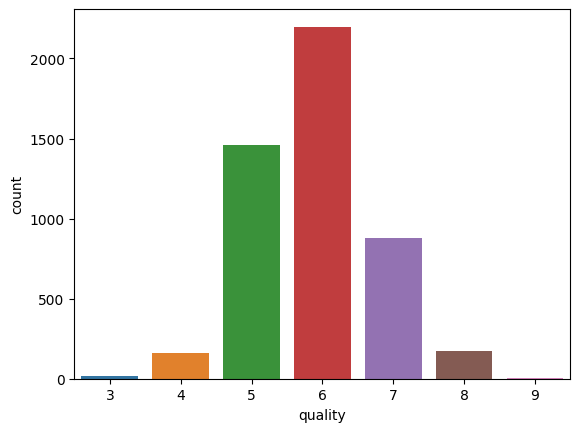

In [17]:
sns.countplot(data = wine_df, x = 'quality')

Some observations from graph above:
* Most wine samples in our data are rated 5 and 6, followed by 7.
* No wine sample is rated above 8 or below 3. This implies that a wine sample of extremely high quality (9 or 10) or very low quality (0, 1 or 2) rating can either be thought of as a hypothetically ideal situation, or that probably that data is suffering from sampling bias, where the samples of extreme quality didn’t get any representation within the survey.
* Our last assumption of a sampling bias within the data is further strengthened as we notice that a majority of wine samples are rated 5 or 6.
* A model trained on such data will produce biased results, where it is more likely to classify a wine sample as a 5 or 6 on the quality scale as compared to, say, 3 or 8. 

To know more about sampling bias or how to deal with it, check out this [article](https://datamahadev.com/sampling-bias-in-data-science/).

## Model training

Split dataset into the train and test sequences to train models and test its performance (e.g. accuracy)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# running split function on our dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3918, 8), (3918,), (980, 8), (980,))

Choosing the model for classification. Please, read documentation before using any models. It is quite useful.

In [21]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [22]:
model = KNN()

Train model

In [23]:
model.fit(X_train, y_train)

KNeighborsClassifier()

Evaluate its performance on test sequence with accuracy score

In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test, y_pred)

0.5612244897959183

Search for the best `K` hyperparameter value in KNN model for this dataset.

In [27]:
k_values = list(range(1,20))
accuracy_list = []

In [28]:
for k in k_values:
    m = KNN(n_neighbors=k)      # initialize model with K value
    m.fit(X_train, y_train)     # train model
    y_pred = m.predict(X_test)  # evaluate model
    accuracy_list.append(accuracy_score(y_test, y_pred))

<Axes: >

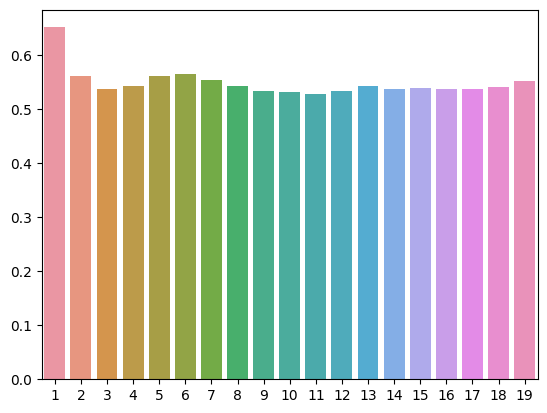

In [29]:
# plotting k-value vs accuracy plot
sns.barplot(data = { 'k_values': k_values, 'accuracy': accuracy_list }, x = 'k_values', y = 'accuracy')

Then building a model with the best `K` hyperparameter value. Now it can be used in future predictions

In [30]:
model = KNN(n_neighbors = 5)

In [31]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = model.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.5612244897959183

## Hyperparameter tuning with Grid Search

In [34]:
from sklearn.model_selection import GridSearchCV

Specifying available values for different hyperparameters. Many combinations of them will be used while searching for the best value.

In [35]:
params = {
    'penalty': ['l1','l2'], 
    'C': [0.001,0.01,0.1,1,10,100,1000], 
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
}

Now we want to fit logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
# disabling all the python warnings in notebook
import warnings
warnings.filterwarnings('ignore')

In [38]:
clf = GridSearchCV(
    LogisticRegression(), # model for grid search
    param_grid = params,  # hyperparameters value
    scoring='accuracy',   # metric for scoring
    cv=5,                 # number of fold in cross validation
)

In [39]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

Best estimator score while grid search:

In [40]:
clf.best_score_

0.5339507258842235

Best hyperparameters values while grid search:

In [41]:
clf.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

Training a model with the best values after grid search

In [42]:
logreg = LogisticRegression(C=1, solver='newton-cg')

In [43]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1, solver='newton-cg')

LogisticRegression has `score` method for scoring the model. It is combination of `predict` and calling your metrics function, e.g. `accuracy_score`

In [44]:
logreg.score(X_test, y_test)

0.5214285714285715

In [45]:
y_pred = logreg.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred)

0.5214285714285715

## Useful links and resources:

EDA:
1. GitHub: [EDA mega cheat-sheet with examples](https://github.com/cmawer/pycon-2017-eda-tutorial/blob/master/EDA-cheat-sheet.md)
2. [EDA cheat-sheet](https://www.analyticsvidhya.com/blog/2015/06/infographic-cheat-sheet-data-exploration-python/)
3. kaggle: [EDA cheat-sheet and tutorials](https://www.kaggle.com/getting-started/254970)

ML:
1. towardsdatascience: [ML from Scratch: KNN](https://towardsdatascience.com/ml-from-scratch-k-nearest-neighbors-classifier-3fc51438346b)
2. kaggle: [PyTorch Linear Regression from scratch](https://www.kaggle.com/code/aakashns/pytorch-basics-linear-regression-from-scratch/notebook)
3. kaggle: [Linear Regression + EDA](https://www.kaggle.com/code/prnvthkkr/linear-regression-100-accuracy)
4. sklearn: [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html)
5. towardsdatascience: [Tuning the Hyperparameters](https://towardsdatascience.com/tuning-the-hyperparameters-of-your-machine-learning-model-using-gridsearchcv-7fc2bb76ff27)